# Notebook 6: YOLO Parte 2

En este segundo notebook le pasaremos imágenes a la YOLO, con el fin de ver como detecta y clasifica.

### Pasos previos
Instalamos las librerías que nos van hacer falta.

In [0]:
from skimage.exposure import rescale_intensity 
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Como se ha comentado en anteriores notebooks a la hora de mostrar las imágenes lo normal sería utilizar la instrucción cv2.imshow() pero al estar trabajando sobre cuadernos de Jupyter esta instrucción no funciona bien, por lo que vamos a usar la función mostrarImagen() a la que le pasamos como parámetro la imagen a mostrar. 

In [0]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

Comprobamos que nos encontramos en el directorio de la darknet

In [0]:
!pwd

/home/alumno/Descargas/darknet


Una vez que estamos dentro el siguiente paso será descargarnos los pesos de nuestra red que como hemos dicho en la primera parte del notebook vienen del dataset CoCo, ya que usamos una red preentrenada:

In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2018-05-08 19:49:11--  https://pjreddie.com/media/files/yolov3.weights
Resolviendo pjreddie.com (pjreddie.com)... 128.208.3.39
Conectando con pjreddie.com (pjreddie.com)[128.208.3.39]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 248007048 (237M) [application/octet-stream]
Grabando a: “yolov3.weights.1”

yolov3.weights.1      0%[                    ]   1,54M   182KB/s    eta 31m 7s ^C


Compilamos la darknet para obtener el ejecutable de YOLO.

In [0]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./examples/tag.c -o obj/tag.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./examples/cifar.c -o obj/cifar.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./examples/go.c -o obj/go.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./examples/rnn.c -o obj/rnn.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./examples/segmenter.c -o obj/segmenter.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./examples/regressor.c -o obj/regressor.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./examples/classifier.c -o obj/classifier.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unkno

Y el último paso es ejecutar el ejecutable creado pasándole los pesos y la imagen a detectar. Aunque primero veamos la imagen de la que vamos a detectar.

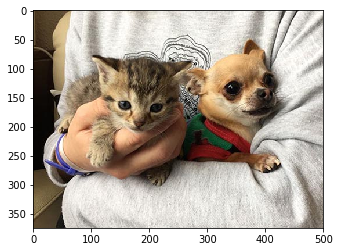

In [0]:
image = cv2.imread("data/galaygatito.jpg")
mostrarImagen(image)

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/galaygatito.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8                 104 x 

Loading weights from yolov3.weights...Done!
data/galaygatito.jpg: Predicted in 14.041853 seconds.
sofa: 72%
dog: 89%
cat: 97%
person: 52%


Hay que tener en cuenta que en este caso YOLO solo muestra aquellas detecciones para las cuales tiene un nivel de confianza igual o superior al 25%.

## Mostrar resultados

El proceso anterior no muestra la imagen resultado, sino que genera una nueva imagen en la carpeta darknet con la predicción. Por lo tanto tenemos que cargar la imagen para que se muestre.

In [0]:
image = cv2.imread("predictions.png")

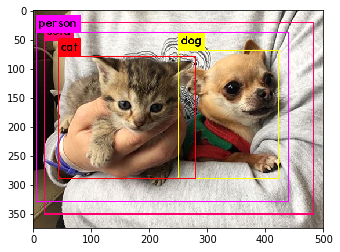

In [0]:
mostrarImagen(image)

## Modificaciones

En este caso vamos hacer que YOLO detecte cosas con un nivel de confianza igual o superior al 85%.

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/galaygatito.jpg -thresh .85

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8                 104 x 

Loading weights from yolov3.weights...Done!
data/galaygatito.jpg: Predicted in 16.069911 seconds.
dog: 89%
cat: 97%


Mostramos los resultados obtenidos y vemos que al pedir que se muestren objetos con un nivel de confianza igual o superior al 85% sólo nos muestra al perro con un 89% y al gato con un 97%.

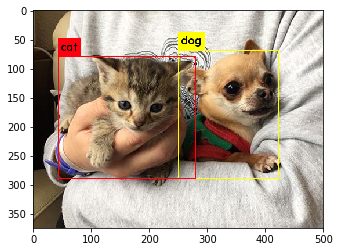

In [0]:
image = cv2.imread("predictions.png")
mostrarImagen(image)

Por último, probamos que YOLO detecte cosas con un nivel de confianza igual o superior al 10%.

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/galaygatito.jpg -thresh .10

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8                 104 x 

Loading weights from yolov3.weights...Done!
data/galaygatito.jpg: Predicted in 14.288408 seconds.
sofa: 72%
bed: 27%
dog: 16%
person: 52%
dog: 89%
cat: 97%
person: 17%


Mostramos los resultados obtenidos y vemos que al pedir que se muestren objetos con un nivel de confianza igual o superior al 10% se han detectado muchas cosas como puede ser un sofá, un cama, una persona, etc.

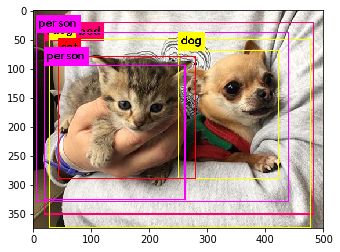

In [0]:
image = cv2.imread("predictions.png")
mostrarImagen(image)

## Otros ejemplos

A continuación aplicamos YOLO a otras imágenes. Para estos emplos vamos a dejar el nivel de confianza por defecto.

### Ejemplo 1


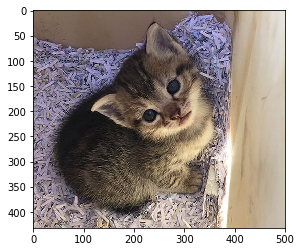

In [0]:
image = cv2.imread("data/gatitopeque.jpg")
mostrarImagen(image)

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/gatitopeque.jpg 

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8                 104 x 

Loading weights from yolov3.weights...Done!
data/gatitopeque.jpg: Predicted in 14.003687 seconds.
cat: 95%


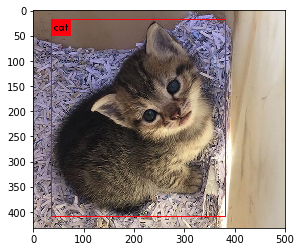

In [0]:
image = cv2.imread("predictions.png")
mostrarImagen(image)

### Ejemplo 2

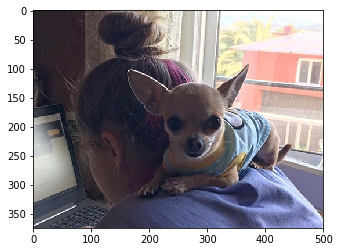

In [0]:
image = cv2.imread("data/gala.jpeg")
mostrarImagen(image)

In [0]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/gala.jpeg 

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8                 104 x 

Loading weights from yolov3.weights...Done!
data/gala.jpeg: Predicted in 13.964199 seconds.
laptop: 100%
dog: 99%
person: 74%


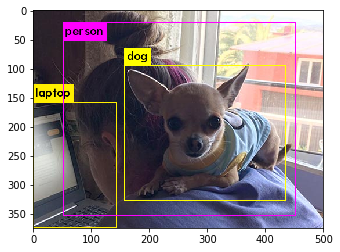

In [0]:
image = cv2.imread("predictions.png")
mostrarImagen(image)

### Ejemplo 3

Por último, para poder detectar objetos sobre un vídeo usamos la siguiente instrucción. Hay que tener en cuenta que al ser un vídeo no se puede incluir en el notebook, por lo que no se ejecuta.

In [0]:
./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights video.mp4